## Introduction to Q-learning with OpenAI Gym
This is a step-by-step guide to using Q-learning in a simple OpenAI gym environment.

The notebook is based on https://github.com/gelanat/reinforcement-learning/blob/ba523383ef3e9de270eb1fd4d46b475d716a2274/Q-learning.ipynb

### Table of Contents

#### [Setup and Environment](#Setup_and_Environment)
- in this section, we download and examine the environment after importing all the necessary libraries;

#### [Q-learning](#Q-learning)
- in this section, we use Q-learning to solve the Taxi problem.


## Setup and Environment <a name='Setup_and_Environment'></a>

1. Install the necessary packages and libraries;
2. Set up the Taxi environment;
3. Determine the state and action space for our Q-table.

In [3]:
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [4]:
# Fixing seed for reproducibility
np.random.seed(0) 

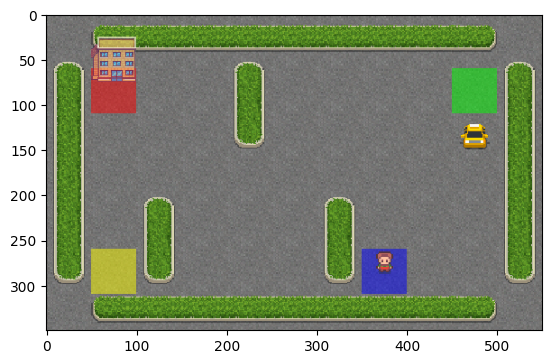

In [9]:
# Loading and rendering the gym environment
#env = gym.make("Taxi-v3", render_mode="human")
env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
plt.show()

In [10]:
#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


## Q-learning

1. initialize our Q-table given the state and action space in STEP 1;
    - choose the hyperparameters for training;
2. choose an action: explore or exploit in STEP 2;
3. perform the action and measure the reward in STEPs 3 & 4;
4. ^^
5. update the Q-table using the Bellman equation in STEP 5.
    - update the collected rewards
    - use decay to balance exploration and exploitation

In [11]:
#Setting the hyperparameters

max_epsilon = 1
min_epsilon = 0.01
decay = 0.01

train_episodes = 2000
test_episodes = 100          
max_steps = 100

In [12]:
# Class for the agent

class QLearner:
    def __init__(self, n_states, n_actions):
        self.Q = np.zeros((n_states, n_actions))
        self.alpha = 0.7 # learning rate (can be set to a constant instead of a function)
        self.discount_factor = 0.618
        self.epsilon = 1

    def choose_action(self, state):
        # Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1)

        ### STEP 2: SECOND option for choosing the initial action - exploit
        # If the random number is larger than epsilon: employing exploitation
        # and selecting best action
        if exp_exp_tradeoff > self.epsilon:
            return np.argmax(self.Q[state,:])

        ### STEP 2: FIRST option for choosing the initial action - explore
        # Otherwise, employing exploration: choosing a random action
        else:
            return env.action_space.sample()

    def update_Q(self, state, new_state, action, reward):
        ### STEP 5: update the Q-table
        # Updating the Q-table using the Bellman equation
        self.Q[state, action] = self.Q[state, action] + self.alpha * (reward + self.discount_factor * np.max(self.Q[new_state, :]) - self.Q[state, action])


#STEP 1 - Initializing the Q-table
agent = QLearner(env.observation_space.n, env.action_space.n)

In [13]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []

def train_agent():
    for episode in range(train_episodes):
        # Reseting the environment each time as per requirement
        state, info = env.reset()
        # Starting the tracker for the rewards
        total_training_rewards = 0

        for step in range(100):
            action = agent.choose_action(state)
            ### STEPs 3 & 4: performing the action and getting the reward
            # Taking the action and getting the reward and outcome state
            new_state, reward, terminated, truncated, info = env.step(action)

            agent.update_Q(state, new_state, action, reward)
            total_training_rewards += reward
            state = new_state

            # Ending the episode
            if terminated or truncated:
                # print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
                break

        # Cutting down on exploration by reducing the epsilon
        agent.epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)

        # Adding the total reward and reduced epsilon values
        training_rewards.append(total_training_rewards)
        epsilons.append(agent.epsilon)


train_agent()

print("Training score over time: " + str(sum(training_rewards)/train_episodes))

Training score over time: -18.657


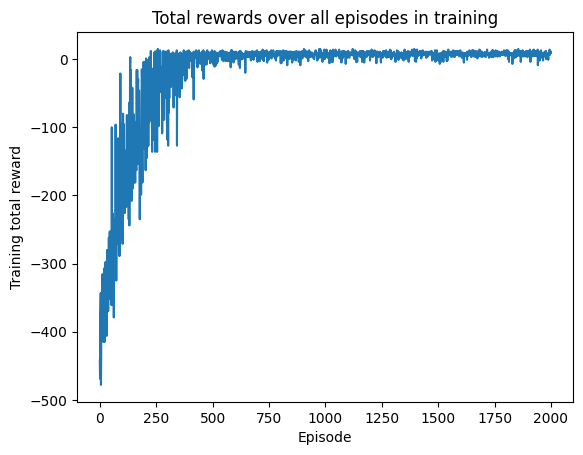

In [14]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

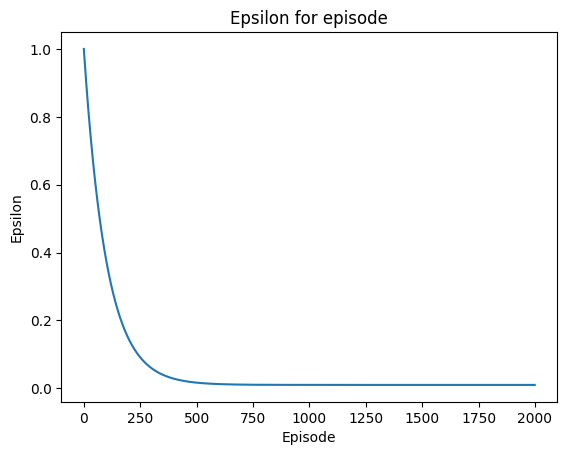

In [15]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

step = 0


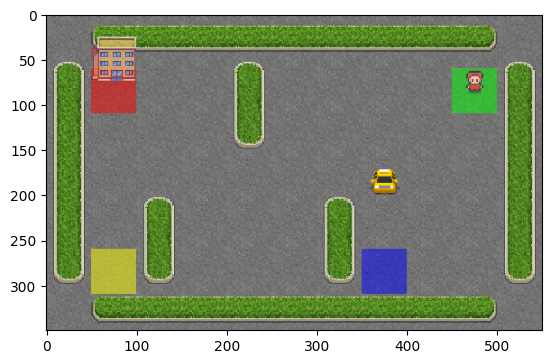

reward: -1
step = 1


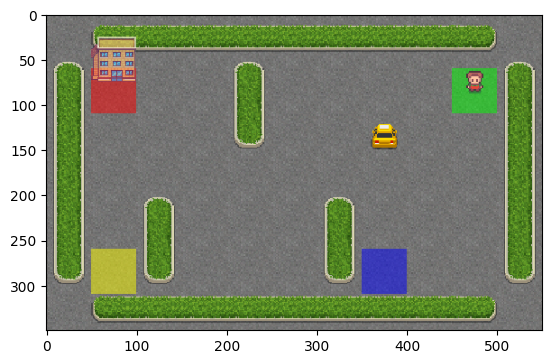

reward: -1
step = 2


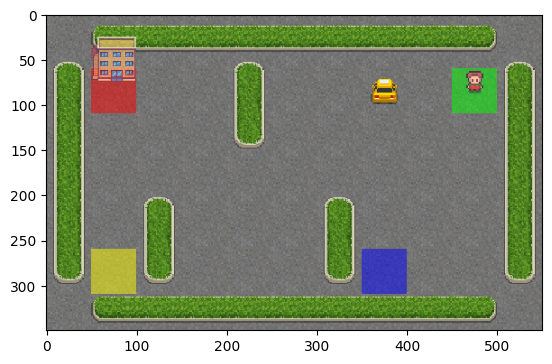

reward: -1
step = 3


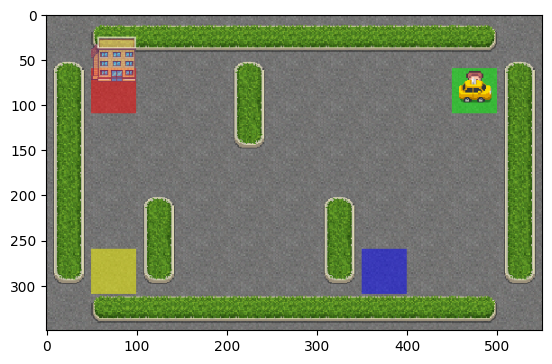

reward: -1
step = 4


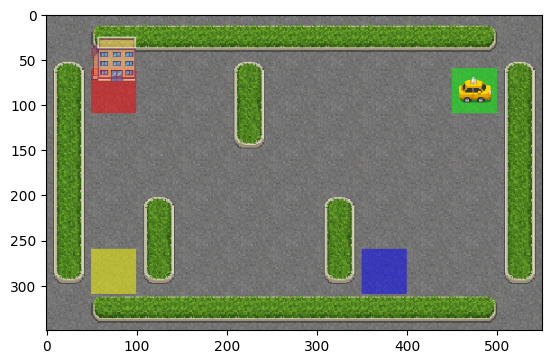

reward: -1
step = 5


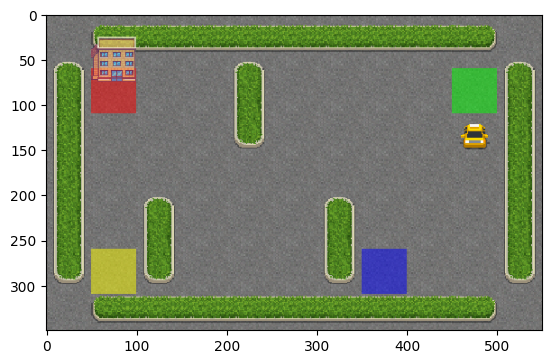

reward: -1
step = 6


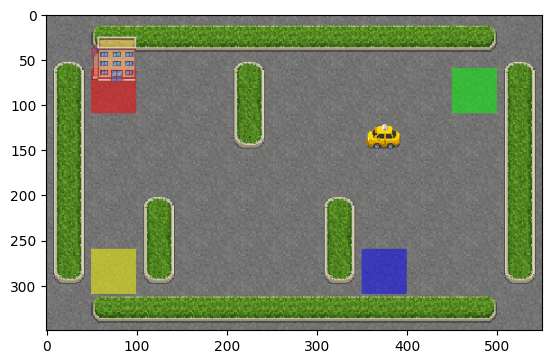

reward: -1
step = 7


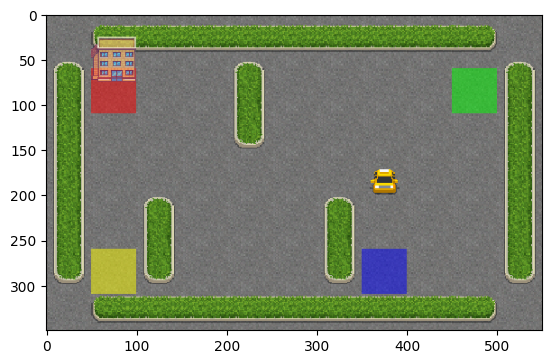

reward: -1
step = 8


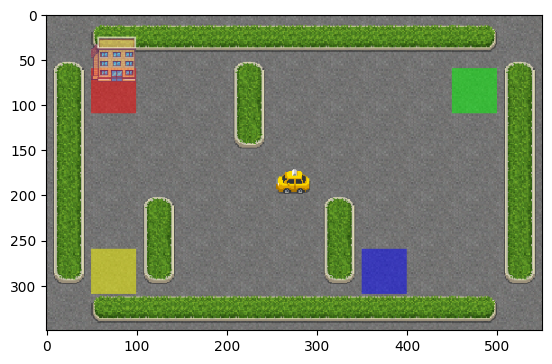

reward: -1
step = 9


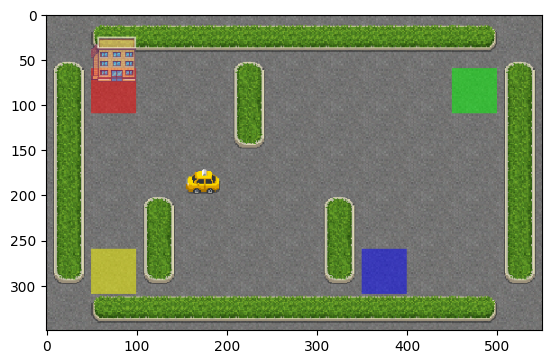

reward: -1
step = 10


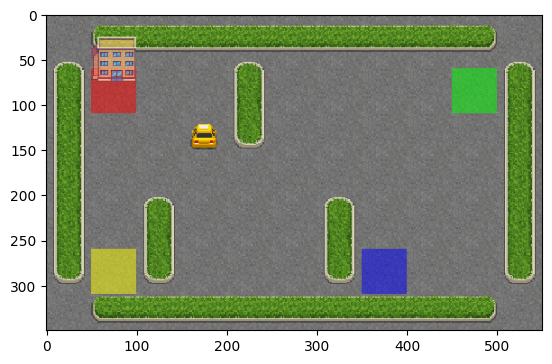

reward: -1
step = 11


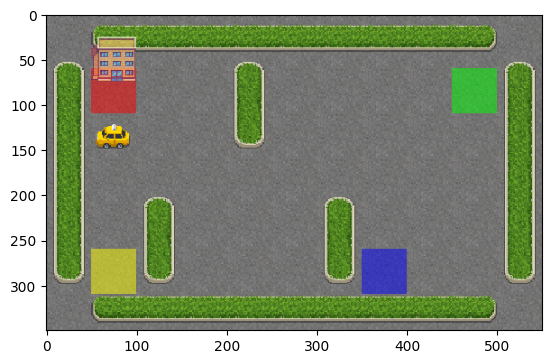

reward: -1
step = 12


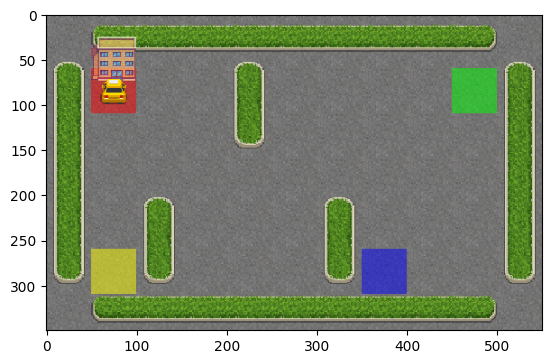

reward: 20
game finished!
Total reward: 8.0


In [16]:
import time

def showcase_agent():
    state, info = env.reset()
    total_rewards = 0.0
    agent.epsilon = 0.0 # we don't want random actions here
    for step in range(100):
        print(f"step = {step}")
        plt.imshow(env.render())
        plt.show()
        time.sleep(0.1)
        action = agent.choose_action(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        print(f"reward: {reward}")
        total_rewards += reward
        state = new_state

        #Ending the episode
        if terminated or truncated:
            print("game finished!")
            print(f"Total reward: {total_rewards}")
            break
    env.close()

showcase_agent()